# EDA on the training data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline
%run -i ./Data_Processing/feature_info.py

In [2]:
training_data = pd.read_csv('./Datasets/training_data_full.csv')

# Distribution of the target variable

In [3]:
training_data.head(3)

,StateAbbr,StateDesc,CityName,CountyFIPS,TractFIPS,BPMED_2017,Unemployment_trend,Unemployment_rate_2017,BPMED_trend,CHOLSCREEN_2017,...,BPHIGH_trend,STROKE_2017,STROKE_trend,KIDNEY_2017,KIDNEY_trend,MHLTH_2017,MHLTH_trend,COPD_2017,COPD_trend,diabetes_change_rate_2020
0,AL,Alabama,Birmingham,1073,1073000100,77.8,-0.22807,4.4,-0.027500,78.6,...,0.032468,5.5,-0.017857,4.3,0.023810,20.5,0.102151,11.3,0.036697,0.097701
1,AL,Alabama,Birmingham,1073,1073000300,78.5,-0.22807,4.4,-0.022416,76.0,...,0.057018,6.1,0.033898,4.6,0.069767,21.2,0.152174,11.9,0.101852,0.101010
2,AL,Alabama,Birmingham,1073,1073000400,79.4,-0.22807,4.4,-0.031707,80.2,...,-0.019960,5.6,-0.017544,4.2,0.000000,18.8,0.074286,10.5,0.019417,0.027174


In [9]:
np.mean(100 * training_data['diabetes_change_rate_2020'])

1.3889859594419893

#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(0.5, 1.0, 'Diabetes Prevalence Percentage Changes')

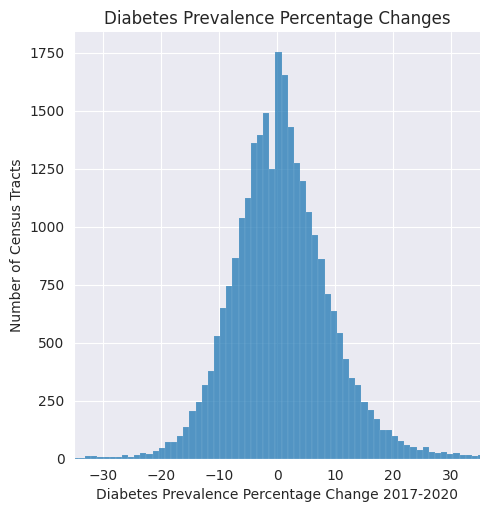

In [13]:
sns.displot(100 * training_data['diabetes_change_rate_2020'], bins=500)
plt.xlim([-35,35])
plt.xlabel('Diabetes Prevalence Percentage Change 2017-2020')
plt.ylabel('Number of Census Tracts')
plt.title('Diabetes Prevalence Percentage Changes')

# Check for collinearities in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

In [5]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = set(training_data.columns) - non_numerical_features - target_features
numerical_features

{'ACCESS2_2017',
 'ACCESS2_trend',
 'ARTHRITIS_2017',
 'ARTHRITIS_trend',
 'BINGE_2017',
 'BINGE_trend',
 'BPHIGH_2017',
 'BPHIGH_trend',
 'BPMED_2017',
 'BPMED_trend',
 'CANCER_2017',
 'CANCER_trend',
 'CASTHMA_2017',
 'CASTHMA_trend',
 'CHD_2017',
 'CHD_trend',
 'CHECKUP_2017',
 'CHECKUP_trend',
 'CHOLSCREEN_2017',
 'CHOLSCREEN_trend',
 'COPD_2017',
 'COPD_trend',
 'CSMOKING_2017',
 'CSMOKING_trend',
 'DIABETES_2017',
 'DIABETES_trend',
 'HIGHCHOL_2017',
 'HIGHCHOL_trend',
 'KIDNEY_2017',
 'KIDNEY_trend',
 'LPA_2017',
 'LPA_trend',
 'MHLTH_2017',
 'MHLTH_trend',
 'OBESITY_2017',
 'OBESITY_trend',
 'PHLTH_2017',
 'PHLTH_trend',
 'STROKE_2017',
 'STROKE_trend',
 'Unemployment_rate_2017',
 'Unemployment_trend'}

/tmp/ipykernel_292/3164012346.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_map = training_data[numerical_features].corr()


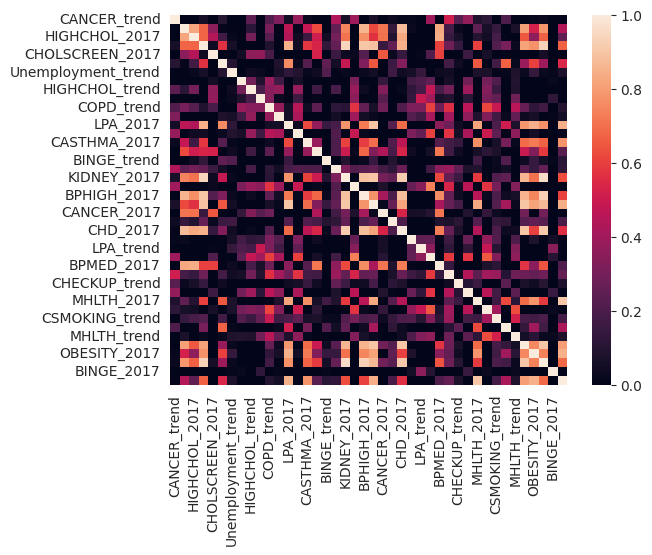

In [6]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

## The Cardiovascular features are pretty strongly correlated with each other:

During modeling these should be combined into 1 or 2 columns

In [7]:
cardiovascular_features = [
    'COPD_2017', # Chronic obstructure pulmonary disease
    'STROKE_2017', # Stroke incidence
    'LPA_2017', # Low Physical Activity
    'BPHIGH_2017', # High BP Incidence
    'KIDNEY_2017' # Chronic kidney disease
]

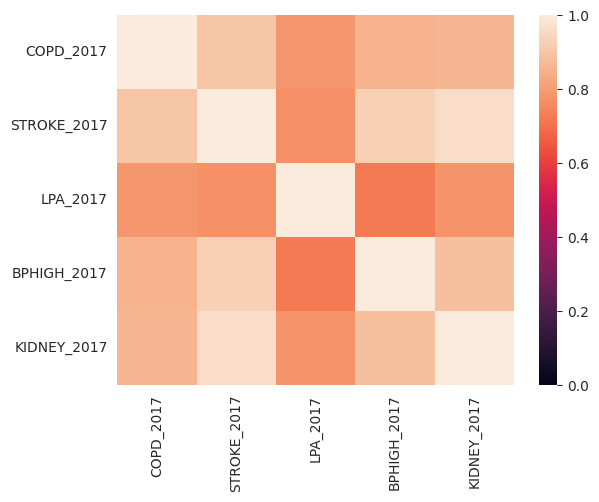

In [8]:
corr_map = training_data[cardiovascular_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);